In [1]:
# The DS is the Star Classification, which has 100 000 rows and 18 columns.
# The ds is multiclass classification with 3 classes: Star, Galaxy, Quasar.

In [2]:
# Import libraries
import pandas as pd        
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import resample 
from sklearn.datasets import make_classification 
from statsmodels.stats.outliers_influence import variance_inflation_factor         

In [3]:
# Loading the dataset
df = pd.read_csv('star_classification.csv')

In [4]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [5]:
# Take a look at duplicates
df.duplicated().sum()

0

In [6]:
# let's look at some statistics of my ds
df.describe()
# what I learned from google, Redshift is related to distance.
# it's range is around -0.009 to 7, higher value means further distance.
# Alpha and Delta are coordinates in the sky. from 0 degree to 360 degree.

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
# Details of the ds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

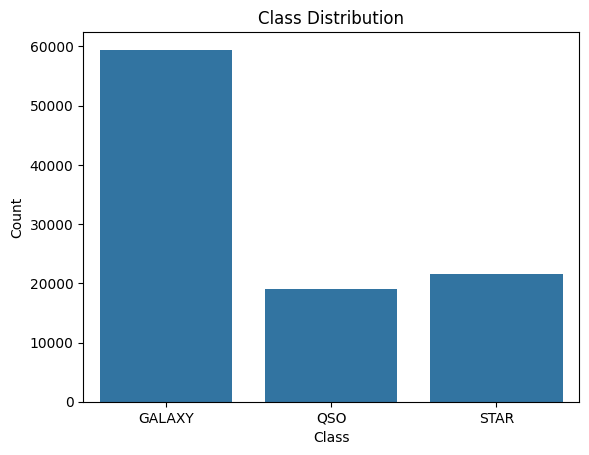

In [8]:
# let's see the class distribution, is it balanced or imbalanced?
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# The class distribution is imbalanced, I will handle it later

<h1><center> Preprocessing</center><h1>

In [9]:
# In ds there are some columns that are not useful for my analysis, so I will drop them
df.drop(["obj_ID", "run_ID", "rerun_ID", "field_ID", "spec_obj_ID", "fiber_ID", "MJD", "plate"], axis=1, inplace=True)

In [10]:
# Let's take a look at the class distribution again
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [11]:
# Convert the 'class' column to numerical values with LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

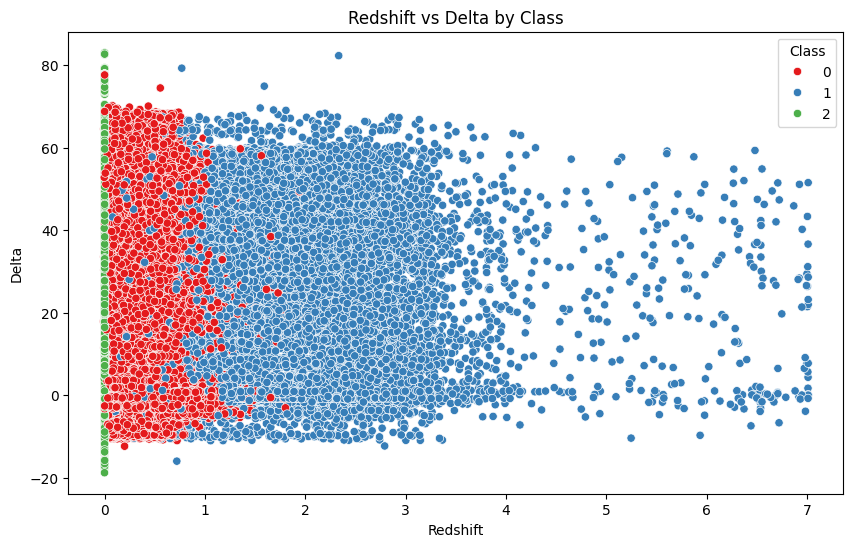

In [12]:
# let's check the relationship between coordinates and redshift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='redshift', y='delta', hue='class', data=df, palette='Set1')
plt.title('Redshift vs Delta by Class')
plt.xlabel('Redshift')
plt.ylabel('Delta')
plt.legend(title='Class', loc='upper right')
plt.show()
# From the plot, I can learn that Stars are mostly at low redshift, which means they are closer to us.
# Galaxies are at medium redshift, and Quasars are at high redshift.

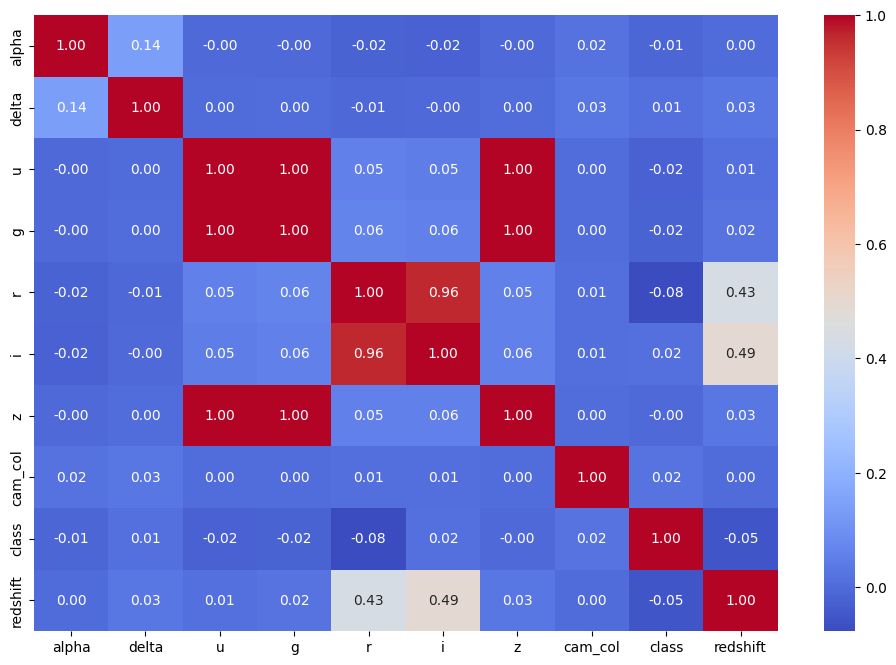

In [115]:
# correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
# I can see high correlation among photometric columns.

In [116]:
# using the variance inflation factor (VIF) to check for multicollinearity in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data
# VIF shows the same high correlation among photometric columns.

,feature,VIF
0,alpha,4.39
1,delta,2.55
2,u,1143.91
3,g,4013.87
4,r,3713.38
5,i,3535.38
6,z,2263.39
7,cam_col,5.77
8,class,2.06
9,redshift,2.04


In [15]:
# let's check the all photometric  columns which have high correlation with each other after handling the outliers
df[['u', 'g', 'r', 'i', 'z']].describe()

,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810
std,31.769291,31.750292,1.854760,1.757895,31.728152
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000
25%,20.352353,18.965230,18.135828,17.732285,17.460677
50%,22.179135,21.099835,20.125290,19.405145,19.004595
75%,23.687440,22.123767,21.044785,20.396495,19.921120
max,32.781390,31.602240,29.571860,32.141470,29.383740


 These column have high correlation with each other and the multicollinearity can effect on th model so I have to create a column for them by their sum/mean, Weighted average and PCA.  I searched on the internet that weighted average is better specially if one of them has significant impact on the class's values. so I try to use chi squared scores to find importance of photometric filters columns


In [16]:
# Create X and y
X = df.drop("class", axis = 1)
y= df["class"]

In [17]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


,Features,Score
8,redshift,94218.97
1,delta,6229.70
6,z,2898.85
5,i,2366.07
0,alpha,2304.28
2,u,1813.91
4,r,1505.24
3,g,1400.40
7,cam_col,38.65


redshift and delta have more effected on the  class values

In [18]:
# Creating new column photometric_filters to store the weighted average of the photometric data columns
df_filers = df[['u', 'g', 'r', 'i', 'z']]


X_cat = df_filers.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_features.fit(X_cat,y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(df_filers.columns)
f_score = pd.concat([df_columns,df_features],axis=1)
f_score.columns = ['Features','Score']
f_score.sort_values(by='Score',ascending=False)

,Features,Score
4,z,2898.85
3,i,2366.07
0,u,1813.91
2,r,1505.24
1,g,1400.40


In [19]:
# After finding the score of each column, I will find the total score of each column
total_score =  f_score['Score'].sum()
total_score

9984.474754726089

In [20]:
# Calculate normalized weights and store them in the list
weights = [score / total_score for score in f_score['Score']]

# I need to sort the weights values and create a new  dataframe to store the weights and each column 
weights.sort(reverse=True) 
df_weights = pd.DataFrame(weights, columns=['Weights'])
df_weights['Features'] = f_score['Features']
df_weights


,Weights,Features
0,0.29,u
1,0.24,g
2,0.18,r
3,0.15,i
4,0.14,z


In [22]:
# After Finding the weight of each column, I will a create a new column 'photometric_filters' to store the weighted average of the photometric data columns
df['photometric_filters'] = (df['u'] * df_weights['Weights'][0]) + (df['g'] * df_weights['Weights'][1]) + (df['r'] * df_weights['Weights'][2]) + (df['i'] * df_weights['Weights'][3]) + (df['z'] * df_weights['Weights'][4])
df.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,photometric_filters
0,135.69,32.49,23.88,22.28,20.40,19.17,18.79,2,0,0.63,21.44
1,144.83,31.27,24.78,22.83,22.58,21.17,21.61,5,0,0.78,22.93
2,142.19,35.58,25.26,22.66,20.61,19.35,18.95,2,0,0.64,22.02
3,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,3,0,0.93,21.78
4,345.28,21.18,19.44,17.58,16.50,15.98,15.54,3,0,0.12,17.40


In [ ]:
# Now I dont need u, g, r, i and  z anymore, so I will drop them from the DS
df = df.drop(['u', 'g', 'r', 'i', 'z', 'cam_col'], axis=1)

In [34]:
df.shape

(100000, 5)

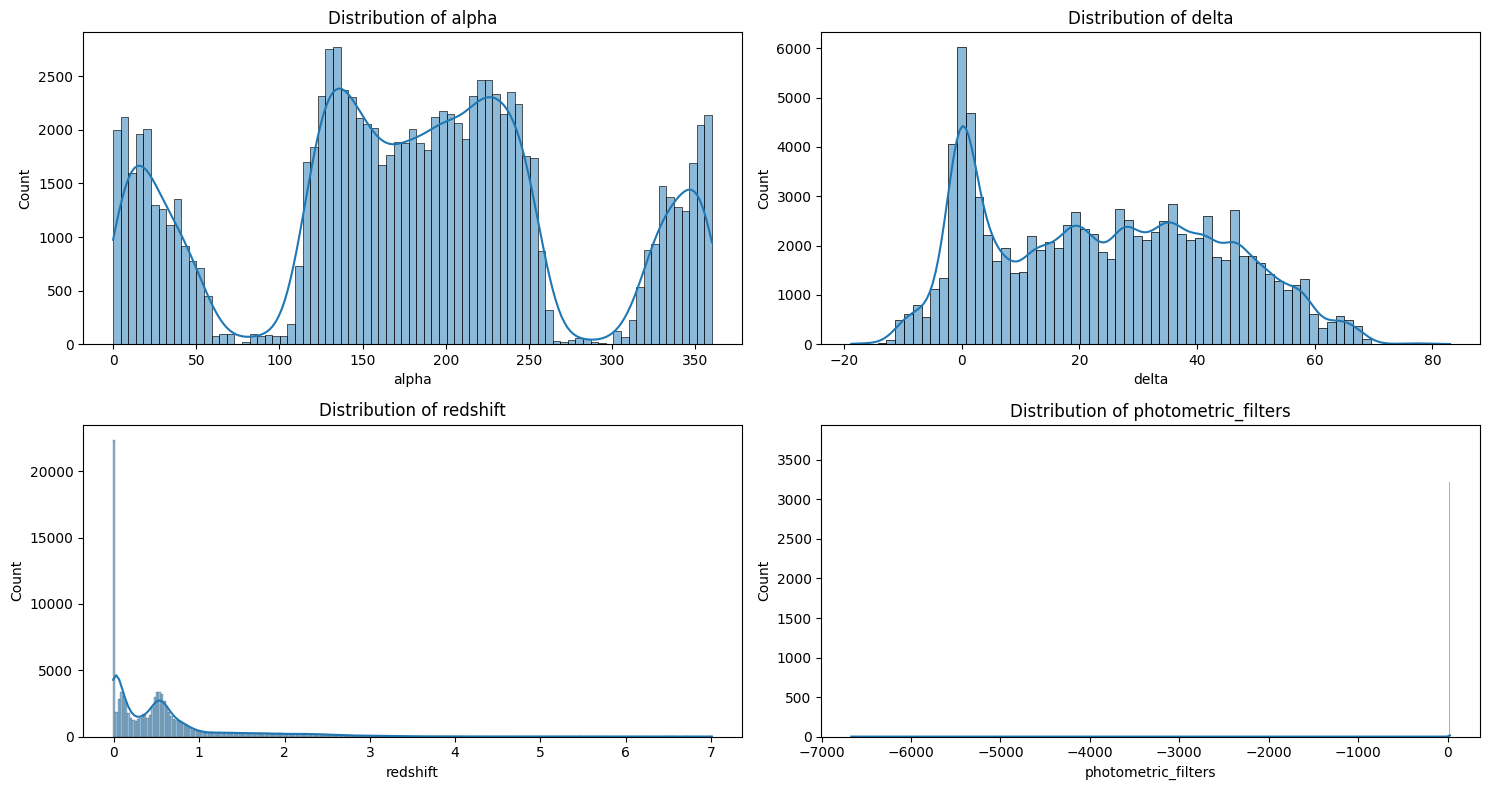

In [ ]:
# let's see the distribution of the features columns
features_columns= df[['alpha', 'delta', 'redshift', 'photometric_filters']]
# I have 6 numeric columns, I need to create 2D grid of axes 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
for column, ax in zip(features_columns, axes.ravel()):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()
# Alpha and Delta have normal distribution, but redshift is right-skewed.

In [36]:
# save the dataset to a new csv file as training data 
df.to_csv('classification_cleaned.csv', index=False)